# NPS Project
See my github repo: [noltron000](https://github.com/noltron000/ds-1-1-nps-project)

In [221]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plot

data = pandas.read_csv('surveys/2017/student_feedback.csv')

In [222]:
data.head(6)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right


## Parsing Data

In [223]:
# drop the arbitrary ID column; its not relevent
data = data.drop('ID', axis=1)

In [224]:
# I don't like capitalization at all in my dataset...
data['Location'] = data['Location'].str.lower()
data['Track'] = data['Track'].str.lower()
data['Schedule Pacing'] = data['Schedule Pacing'].str.lower()

In [225]:
# Dropping the first five characters from the week column;
# this should gives a numeric string in the end.
#
# Each week begins with five characters -- "week "
# and ends with a numeric string, such as "3".
data['Week'] = data['Week'].str[5:]

# Still, the data is all stored as strings.
data.dtypes

Location           object
Track              object
Week               object
Rating (Num)       object
Schedule Pacing    object
dtype: object

In [226]:
# Start by converting weeks to a float value.
# I use float because it allows NaN, unlike integers.

data['Week'] = pandas.to_numeric(data['Week'], errors='coerce').astype(int)

data.dtypes

Location           object
Track              object
Week                int64
Rating (Num)       object
Schedule Pacing    object
dtype: object

In [227]:
# Looks like the rating is a string too, instead of a number.

# First a rename would be nice.
data['Rating'] = data['Rating (Num)']
data = data.drop('Rating (Num)', axis=1)

# Now we can convert these ratings to numeric values as well.
data['Rating'] = pandas.to_numeric(data['Rating'], errors='coerce').astype(float)

data.dtypes

Location            object
Track               object
Week                 int64
Schedule Pacing     object
Rating             float64
dtype: object

In [228]:
# data['Track']

########
# TODO #
########
# I'd really like to split the data['Track'] column up...
# However I'll need to visit Kash in office hours to get help with this.
# This field is string data, but its actually comma-delimited.
# The data can hold more than one item, and I need a structure to represent this.

data.dtypes

Location            object
Track               object
Week                 int64
Schedule Pacing     object
Rating             float64
dtype: object

### NPS  <small>(net promoter score)</small>

The main purpose of this assignment is to find NPS statistics on this dataset. Determining the NPS statistics of a single row is easy. Each row has a *Rating* entry. If the value is 8 or more, the review is as a "promoter". If the value is 7 or less, the review is as a "detractor". Its simply a way to catagorize these numeric entries.

One way to go about this problem is to generate a simple new column based on the *Rating* column. We can call the new column NPS. The code below handles these situations.

In [229]:
# store conditionals as variables
promoter = data['Rating'] >= 8
detractor = data['Rating'] < 8

# UGLY: please refactor me!
data['NPS'] = numpy.where(promoter, 'promoter', numpy.where(detractor, 'detractor', numpy.nan))

data.head()

,Location,Track,Week,Schedule Pacing,Rating,NPS
0,san francisco,"apps, explorer",1,just right,3.0,detractor
1,los angeles,apps,1,a little too fast,4.0,detractor
2,san francisco,games,1,way too slow,4.0,detractor
3,NaN,NaN,2,a little too fast,4.0,detractor
4,new york city,"apps, explorer",1,just right,4.0,detractor


In [232]:
# Made a groupby for NPS
nps_group = data.groupby(['NPS'])
nps_group.head()

,Location,Track,Week,Schedule Pacing,Rating,NPS
0,san francisco,"apps, explorer",1,just right,3.0,detractor
1,los angeles,apps,1,a little too fast,4.0,detractor
2,san francisco,games,1,way too slow,4.0,detractor
3,NaN,NaN,2,a little too fast,4.0,detractor
4,new york city,"apps, explorer",1,just right,4.0,detractor
96,atlanta,"apps, explorer",1,just right,8.0,promoter
97,atlanta,apps,1,just right,8.0,promoter
98,atlanta,"apps, explorer",1,just right,8.0,promoter
99,atlanta,apps,1,a little too slow,8.0,promoter
100,redwood city,apps,1,a little too slow,8.0,promoter


## Visualizations

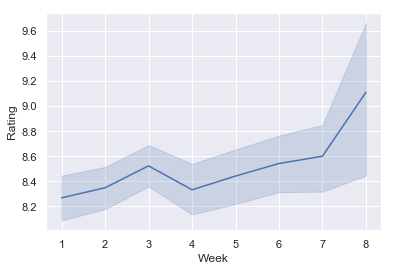

In [231]:
seaborn.set(style='darkgrid')

seaborn.lineplot(x='Week', y='Rating', data=data)